In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

Load BTCUSDT data

In [3]:
data = pd.read_csv('./data/BTCUSDT_1h.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

print(data.head(5))
print(data.tail(5))

                               open      high       low     close     volume
date                                                                        
2021-06-28 23:00:00+00:00  34408.41  34490.07  34102.00  34487.22  16031.250
2021-06-29 00:00:00+00:00  34486.58  35178.00  34362.55  34901.00  40511.651
2021-06-29 01:00:00+00:00  34901.00  35000.00  34517.21  34622.91  24959.479
2021-06-29 02:00:00+00:00  34622.92  34836.14  34245.00  34306.78  25493.494
2021-06-29 03:00:00+00:00  34306.77  34631.37  34206.00  34564.83  18568.596
                              open     high      low    close     volume
date                                                                    
2022-10-14 15:00:00+00:00  19456.9  19507.1  19300.0  19352.9  52911.236
2022-10-14 16:00:00+00:00  19352.9  19395.0  19213.0  19297.0  54105.484
2022-10-14 17:00:00+00:00  19297.0  19368.0  19280.4  19355.1  18482.417
2022-10-14 18:00:00+00:00  19355.1  19355.1  19120.0  19206.8  42404.961
2022-10-14 19:00:00+00:

Apply Isolation Forest for anomaly detection:

In [4]:
# Define and fit the model
model = IsolationForest(contamination=0.01)  # assuming 1% of the data is anomalous
data['anomaly'] = model.fit_predict(data[['close']])

# Filter out the anomaly data
anomalies = data[data['anomaly'] == -1]

Plot the results:

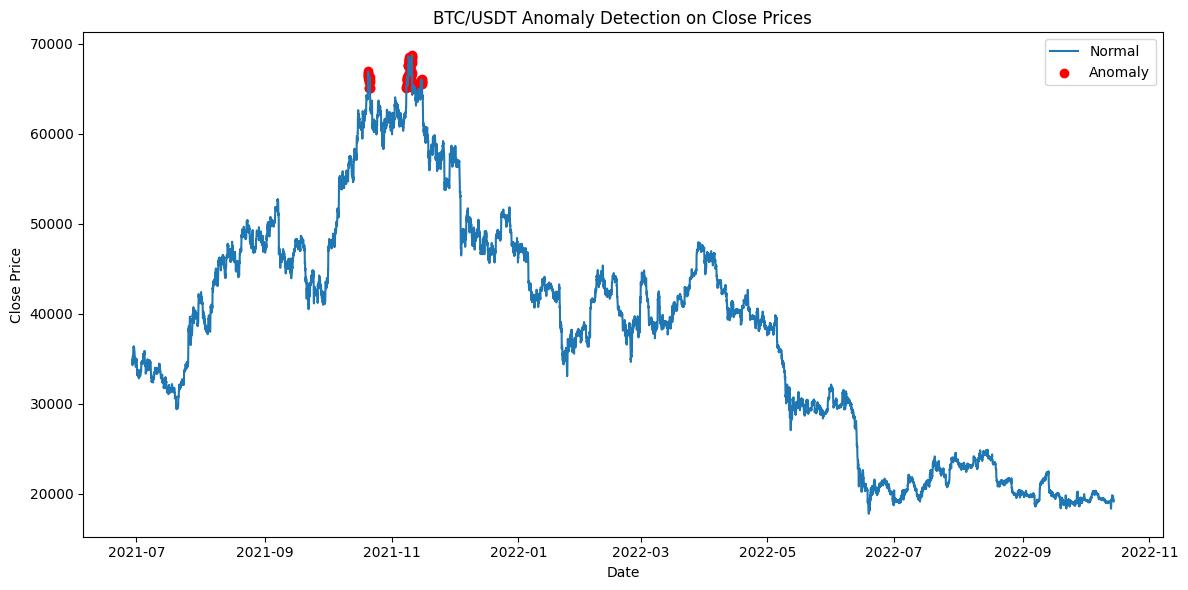

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['close'], label='Normal')
plt.scatter(anomalies.index, anomalies['close'], color='red', label='Anomaly')
plt.legend()
plt.title("BTC/USDT Anomaly Detection on Close Prices")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.tight_layout()
plt.show()


### Use rolling data of 100 periods of high, low, open, close to predict if last close is an anomaly

In [31]:
data = pd.read_csv('./data/BTCUSDT_1h.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# data = data.tail(200)
print(data.head(5))
print(data.tail(5))

                               open      high       low     close     volume
date                                                                        
2021-06-28 23:00:00+00:00  34408.41  34490.07  34102.00  34487.22  16031.250
2021-06-29 00:00:00+00:00  34486.58  35178.00  34362.55  34901.00  40511.651
2021-06-29 01:00:00+00:00  34901.00  35000.00  34517.21  34622.91  24959.479
2021-06-29 02:00:00+00:00  34622.92  34836.14  34245.00  34306.78  25493.494
2021-06-29 03:00:00+00:00  34306.77  34631.37  34206.00  34564.83  18568.596
                              open     high      low    close     volume
date                                                                    
2022-10-14 15:00:00+00:00  19456.9  19507.1  19300.0  19352.9  52911.236
2022-10-14 16:00:00+00:00  19352.9  19395.0  19213.0  19297.0  54105.484
2022-10-14 17:00:00+00:00  19297.0  19368.0  19280.4  19355.1  18482.417
2022-10-14 18:00:00+00:00  19355.1  19355.1  19120.0  19206.8  42404.961
2022-10-14 19:00:00+00:

Apply Isolation Forest with a rolling window:

In [32]:
window_size = 100
data['anomaly'] = 0  # Initialize anomaly column

for start in range(0, len(data) - window_size + 1):
    end = start + window_size
    subset = data.iloc[start:end]

    # print(f'Processing {start} to {end}...')
    
    # If using the current window to predict the last point's anomaly
    train = subset.iloc[:-1]
    test = subset.iloc[-1:]
    
    model = IsolationForest(contamination=0.01)
    model.fit(train[['high', 'low', 'open', 'close']])
    
    test_pred = model.predict(test[['high', 'low', 'open', 'close']])
    data.loc[test.index, 'anomaly'] = test_pred

    # exit if anomaly detected
    # if test_pred == -1:
    #     break




In [35]:
# print where abnormality is detected
idx = data.loc[data['anomaly'] == 1]
print(idx)


                               open      high       low     close     volume  \
date                                                                           
2021-07-03 02:00:00+00:00  33652.07  33665.78  33450.00  33506.90  12853.858   
2021-07-03 03:00:00+00:00  33506.91  33560.01  33296.98  33500.95  18136.947   
2021-07-03 04:00:00+00:00  33500.21  33676.91  33425.84  33641.91  16114.490   
2021-07-03 05:00:00+00:00  33641.91  33776.00  33552.32  33683.02  14686.855   
2021-07-03 06:00:00+00:00  33683.01  33822.72  33626.21  33670.01  16350.314   
...                             ...       ...       ...       ...        ...   
2022-10-14 15:00:00+00:00  19456.90  19507.10  19300.00  19352.90  52911.236   
2022-10-14 16:00:00+00:00  19352.90  19395.00  19213.00  19297.00  54105.484   
2022-10-14 17:00:00+00:00  19297.00  19368.00  19280.40  19355.10  18482.417   
2022-10-14 18:00:00+00:00  19355.10  19355.10  19120.00  19206.80  42404.961   
2022-10-14 19:00:00+00:00  19206.90  192

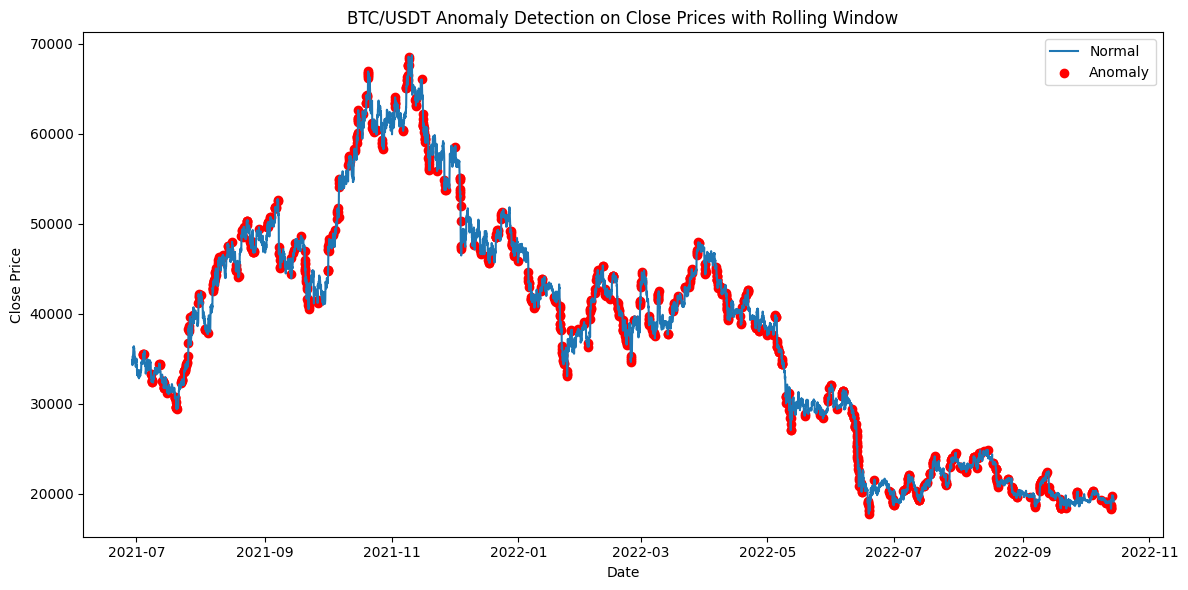

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['close'], label='Normal')
anomalies = data[data['anomaly'] == -1]
plt.scatter(anomalies.index, anomalies['close'], color='red', label='Anomaly')
plt.legend()
plt.title("BTC/USDT Anomaly Detection on Close Prices with Rolling Window")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.tight_layout()
plt.show()


In [ ]:
# !pip install mplfinance

In [46]:
import pandas as pd
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Calculate the rolling average of the 'close' column for the last 100 periods
data['rolling_avg'] = data['close'].rolling(window=100).mean()


# Select last 100 rows
data_last_100 = data.iloc[-100:]

ohlc = data_last_100[['open', 'high', 'low', 'close']].reset_index()
ohlc['date'] = ohlc['date'].apply(mdates.date2num)


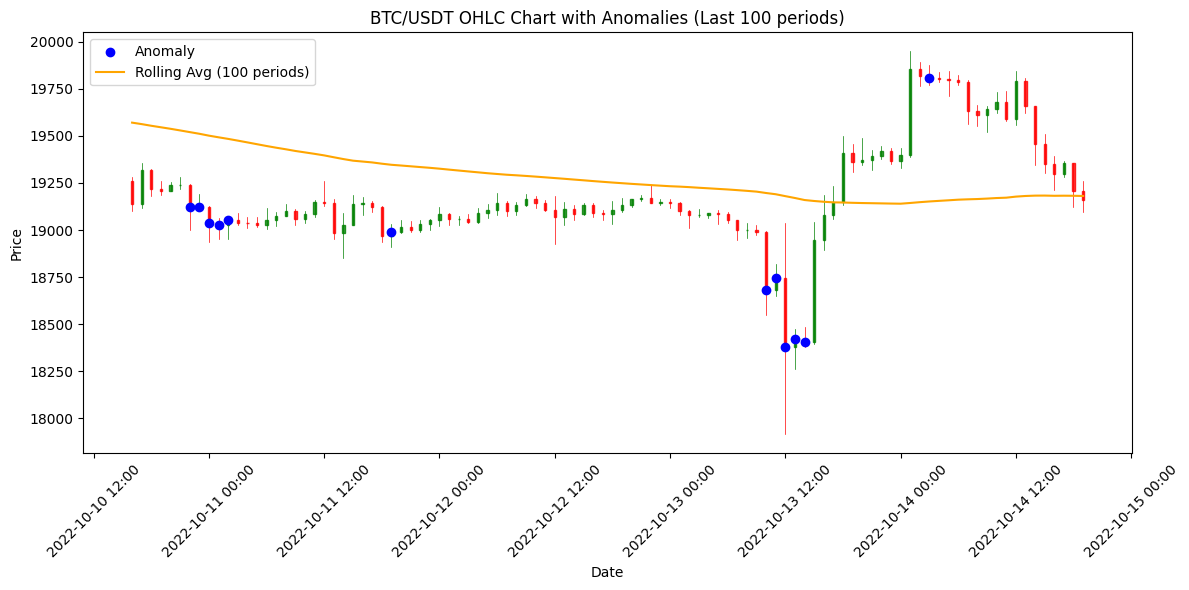

In [47]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the candlestick chart
candlestick_ohlc(ax, ohlc.values, width=0.01, colorup='green', colordown='red', alpha=0.8)

# Highlight anomalies
anomalies = data_last_100[data_last_100['anomaly'] == -1].reset_index()
ax.scatter(anomalies['date'].apply(mdates.date2num), anomalies['close'], color='blue', label='Anomaly', zorder=5)

# Plot the rolling average
ax.plot(data_last_100.index, data_last_100['rolling_avg'], color='orange', label='Rolling Avg (100 periods)')


ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)
plt.title('BTC/USDT OHLC Chart with Anomalies (Last 100 periods)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
plt.legend()
plt.show()
